## 课程论文

 请务必交到exer8文件夹下，**谢绝交到master下**
+ 请不要改动任何文件，拜托
+ 请于12月30日前先在github上提交
+ 请在元旦后提交纸质版，将本页面文件先打印为pdf格式，再去打印店付印
+ 请将论文模板和本页面文件一起装订，前者放上面，本页面文件放下面
+ 纸质版提交时间和地点请留意微信群通知

请写一下姓名和学号：
+ 姓名  王文韬
+ 学号  0165224

### 样本均值分布的统计试验

+ 请将CEPS.csv数据读入python
+ 请从中随机抽取1000个数据
+ 请根据问卷从数据中挑选两个连续型变量（likert量表可以近似看作连续变量）
+ 计算这两个连续变量的均值
+ 重复随机抽取—计算均值这个过程30次，得到两个变量30个样本均值
+ 绘制这30个样本均值的直方图
+ 计算均值的均值和标准误

In [14]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

In [15]:
#解决中文显示问题
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus'] = False

In [16]:
df = pd.read_csv('CEPS.csv',encoding='gb2312')
df = pd.DataFrame(df)

D:\ProgramData\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (20,22,23,25,28,29,39,49,74,124,125,126,127,128,129,130,131,138,140,141,147,160,161,162,165,170,174,175,176,177,179,180,181,182,183,184,188,191,194,195,196,199,221,222,223,224,251,252,254,289,290,294,295,296) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


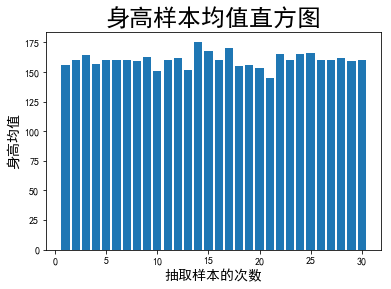

In [17]:
y=[]
for i in range(30):             #均值计算重复三十次
    df=df.sample(n=1000, frac=None, replace=False,  weights=None, random_state=None, axis=None)   
                                #随机选取1000个样本
    df=pd.DataFrame(df)
    x1=df.a13              #挑选身高这一变量
    for x2 in x1:               #将Dataframe转化为list
        x2=x2.strip()           #去除空白字符
        if x2=="":              #去除缺失值
            continue
        x=[]
        x2=float(x2)            #将变量类型转化为float
        x.append(x2)
    x=pd.DataFrame(x)
    y.append(x.mean())          #将样本均值添加到一个变量当中
y1=[]
for y2 in y:
    y1.append(float(y2))
y1
x1=range(1,31)
x1
plt.bar(x1, y1)
 
# 设置图表标题并给坐标轴加上标签
# 设置刻度标记的大小
plt.title('身高样本均值直方图', fontsize=24)
plt.xlabel('抽取样本的次数', fontsize=14)
plt.ylabel('身高均值', fontsize=14)
plt.show()

In [18]:
y=pd.DataFrame(y)               #将list转化为dataframe
print(y.mean())                 #计算样本均值的均值
print(y.std())                  #计算样本均值的标准差（标准误）

0    160.1
dtype: float64
0    5.85662
dtype: float64


D:\ProgramData\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (20,22,23,25,28,29,39,49,74,124,125,126,127,128,129,130,131,138,140,141,147,160,161,162,165,170,174,175,176,177,179,180,181,182,183,184,188,191,194,195,196,199,221,222,223,224,251,252,254,289,290,294,295,296) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


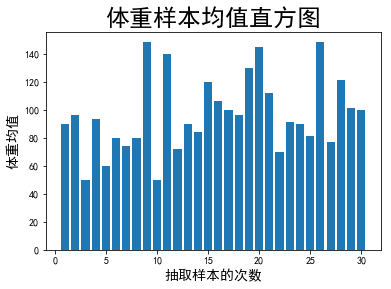

In [19]:
#第二个变量选取为体重，操作流程与代码与上一题大致相同
df = pd.read_csv('CEPS.csv',encoding='gb2312')
df = pd.DataFrame(df)

y=[]
for i in range(30):
    df=df.sample(n=1000, frac=None, replace=False,  weights=None, random_state=None, axis=None)
    df=pd.DataFrame(df)
    x1=df.a14
    for x2 in x1:
        x2=x2.strip()
        if x2=="":
            continue
        x=[]
        x2=float(x2)
        x.append(x2)
    x=pd.DataFrame(x)
    y.append(x.mean())
y1=[]
for y2 in y:
    y1.append(float(y2))
y1
x1=range(1,31)
x1
plt.bar(x1, y1)
 
# 设置图表标题并给坐标轴加上标签
# 设置刻度标记的大小
plt.title('体重样本均值直方图', fontsize=24)
plt.xlabel('抽取样本的次数', fontsize=14)
plt.ylabel('体重均值', fontsize=14)
plt.show()

In [20]:
y=pd.DataFrame(y)          #将list转化为dataframe
print(y.mean())           #计算样本均值的均值
print(y.std())            #计算样本均值的标准差（标准误）

0    96.5
dtype: float64
0    27.009258
dtype: float64


### 回归分析

+ 请从CEPS.csv数据里挑选若干变量建立回归方程，要求至少三个自变量
    + 如，学生的学业成绩受认知水平、家庭收入的影响
    + 考虑因变量和自变量间的实质关系，变量间关系应该是有意义
    + 选择自变量时，注意变量的类型，如果是分类变量，需要进行编码
+ 请报告回归方程的结果，需要包括：
    + 模型拟合指标
    + 模型的显著性检验结果
    + 变量的系数
    + 各系数的显著性检验结果
    + 对模型结果的解释
    

In [21]:
%matplotlib inline
import csv
import matplotlib.pyplot as plt
from itertools import islice
import statsmodels.api as sm
import statsmodels.formula.api as smf
import pandas as pd
import numpy as np

In [24]:
#自变量：b12：家中藏书  b14a1：每天花多少时间写作业  b21:在寒暑假一般都做什么  
#因变量：c12：目前成绩所处水平


sentinels = {'c12': [' '], 'b12': [' '], 'b14a1': [' '] ,'b2101': [' ']}
df = pd.read_csv('CEPS.csv',encoding='gb2312', na_values=sentinels)
dfg = df.sample(n=1000)

sple = pd.DataFrame({
    'y': dfg.c12,
    'x1': dfg.b12,
    'x2': dfg.b14a1,
    'x3': dfg.b2101,
})
sple=sple.dropna(axis=0,how='any')#删除缺失值


model_x = ['x1','x2','x3']
x = sple.loc[ :,model_x].values
#构建因变量
y = sple['y'].values



model = sm.OLS(y, x) 
#拟合ols回归
results = model.fit()
results.params

#输出结果
print(results.summary())




D:\ProgramData\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (20,22,23,25,28,29,39,49,124,125,126,127,128,129,130,131,138,140,141,147,160,161,162,165,170,174,175,176,177,179,180,181,182,183,184,188,191,195,196,199,221,222,223,224,251,252,254,289,290,294,295,296) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.806
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                     1334.
Date:                Tue, 25 Dec 2018   Prob (F-statistic):               0.00
Time:                        16:18:29   Log-Likelihood:                -1729.2
No. Observations:                 966   AIC:                             3464.
Df Residuals:                     963   BIC:                             3479.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1             0.7815      0.020     38.192      0.0

In [ ]:
#1.模型拟合指标： 决定系数R-squared=0.806>0.8，说明模型的拟合效果较好。

#2.模型的显著性检验结果:该模型x3的P值大于0.05,所以在该模型中自变量没有显著线性关系作用，可剔除.

#3、变量的系数： x1的系数为:0.7815, x2的系数为:0.1162, x3的系数为：0.1183

#4、各系数的显著性检验结果： 全部 p值<0.05，说明这3个自变量的效果都是显著的。

#5、对模型结果的解释： 与现实生活经验相符，每天花多少时间写作业与孩子最后的学习成绩息息相关，而函数建一般干什么也有一定的关系。